In [10]:
import cv2
import tensorflow as tf
from keras.models import load_model
import pickle
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import numpy as np
import random
import keyboard
from time import sleep
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [11]:
dic={0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vechiles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vechiles', 16: 'Vechiles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight or left', 38: 'Keep right', 39: 'Keep left', 40: 'Roundabout mandatory', 41: 'End of no passing', 42: 'End of no passing by vechiles over 3.5 metric tons'}
model = load_model('Vgg_traffic_model.h5')
def load_image(filename,new_model):
    img = image.load_img(filename,target_size = (32,32))
#     flippedimage= cv2.flip(img, 1)
    img=np.flip(img, 1)
    plt.imshow(img)
    cv2.imwrite('flipped.jpg', img)
    img = np.array(img)/255.0
    img = np.expand_dims(img,axis = 0) 
#     img = img.reshape(-1,32,32,1)
    result = new_model.predict(img)
#     print("result",result)
    result = list(result[0])
#     print("arg",np.argmax(result))
    img_index = result.index(max(result))
#     print("index",img_index)
#     print("len",len(result))
    return dic[img_index]

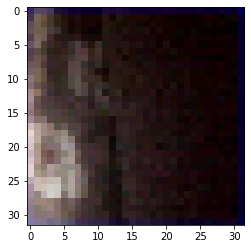

In [12]:
vid = cv2.VideoCapture(0)

font = cv2.FONT_HERSHEY_SIMPLEX 
org = (70, 40) 
fontScale = 1.0
color = (255, 255, 0) 
thickness = 3
while True:
    ret,frame=vid.read()
    cv2.rectangle(frame, (60,150), (210,300), (255,0,0),2)
    cv2.putText(frame, "Put your sign in blue box ", (130,30), font, fontScale, (255,0,0), thickness, cv2.LINE_AA)
    img2=frame[150:300,60:210]
    cv2.imwrite("test.jpg", img2)
    pred2=load_image('test.jpg',model)
    cv2.putText(frame, pred2, (150,400), font,  
                           1, (0,255,0), 3, cv2.LINE_AA) 
    cv2.imshow("frame",frame)
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
  
vid.release() 
cv2.destroyAllWindows()